<a href="https://colab.research.google.com/github/furcap/furcap/blob/main/BOB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
data= pd.read_excel (r'/content/BOB.xlsx')
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-14,182.0,187.199997,181.00,186.550003,185.209518,5640654.0
1,2015-09-15,185.0,187.250000,180.75,181.600006,180.295090,5703930.0


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-14,182.000000,187.199997,181.000000,186.550003,185.209518,5640654.0
1,2015-09-15,185.000000,187.250000,180.750000,181.600006,180.295090,5703930.0
2,2015-09-16,184.000000,184.350006,179.899994,182.550003,181.238266,6249396.0
3,2015-09-18,185.000000,192.250000,184.000000,190.300003,188.932571,13898028.0
4,2015-09-21,186.500000,192.800003,186.199997,192.100006,190.719650,6864603.0
...,...,...,...,...,...,...,...
1471,2021-09-03,78.550003,80.300003,78.250000,79.199997,79.199997,24039114.0
1472,2021-09-06,79.599998,80.199997,78.699997,78.900002,78.900002,14905577.0
1473,2021-09-07,79.000000,79.250000,76.699997,78.099998,78.099998,16964984.0
1474,2021-09-08,78.000000,80.500000,77.650002,79.349998,79.349998,28788968.0


In [7]:
data = data.dropna()

In [8]:
import matplotlib.pyplot as plt

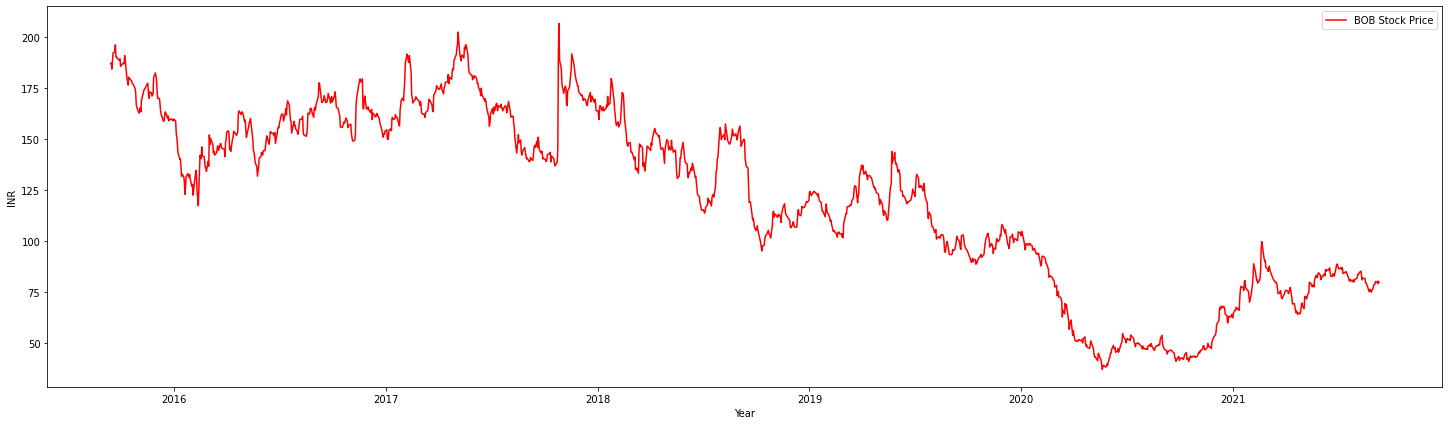

In [9]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date,data.High, color = 'red', label = 'BOB Stock Price')
plt.xlabel('Year')
plt.ylabel('INR')
plt.legend()
plt.show()



In [10]:
data.shape

(1474, 7)

In [11]:
train_size = 0.8        # 80%
split_index = int(train_size * data.shape[0])



In [13]:
factors_column = ['Open', 'High', 'Low', 'Close', 'Volume']
y_col_index = 3 # Close

train_set = data[factors_column].values[:split_index]
test_set = data[factors_column].values[split_index:]


In [14]:
split_index

1179

In [16]:
from sklearn.preprocessing import MinMaxScaler


In [18]:
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
test_set_scaled = sc.fit_transform(test_set)
train_set_scaled[0]

array([0.90674541, 0.88521689, 0.928     , 0.94222922, 0.02880441])

In [20]:
def generate_data(series, y_col_index, time_window=60):
  X = []
  y = []
  for i in range(60, len(series)):
    X.append(series[i-time_window: i])
    y.append(series[i, y_col_index])
  return (np.array(X), np.array(y))

In [21]:
X_train, y_train = generate_data(train_set_scaled, y_col_index=y_col_index)
X_test, y_test = generate_data(test_set_scaled, y_col_index=y_col_index)

In [22]:
print('Training data shape: ',X_train.shape)
print('We will observe {} days price to predict next day price'.format(X_train.shape[1]))

Training data shape:  (1119, 60, 5)
We will observe 60 days price to predict next day price


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [24]:
model = Sequential()

In [25]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = X_train.shape[1:]))
model.add(Dropout(0.2))

# layer 2
model.add(LSTM(units = 30, return_sequences = True))
model.add(Dropout(0.2))

# layer 3
model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.2))

# layer 4
model.add(LSTM(units = 5))
model.add(Dropout(0.2))

# layer 5
model.add(Dense(units = 1))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 30)            9720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 10)            1640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 10)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 5)                 3

In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train,
          y_train,
          epochs = 50,
          batch_size = 64,
          validation_data = (X_test, y_test))

Epoch 1/50
18/18 [==============================] - 10s 187ms/step - loss: 0.1486 - val_loss: 0.0232
Epoch 2/50
18/18 [==============================] - 2s 104ms/step - loss: 0.0490 - val_loss: 0.0145
Epoch 3/50
18/18 [==============================] - 2s 104ms/step - loss: 0.0288 - val_loss: 0.0159
Epoch 4/50
18/18 [==============================] - 2s 104ms/step - loss: 0.0248 - val_loss: 0.0152
Epoch 5/50
18/18 [==============================] - 2s 101ms/step - loss: 0.0242 - val_loss: 0.0166
Epoch 6/50
18/18 [==============================] - 2s 103ms/step - loss: 0.0265 - val_loss: 0.0160
Epoch 7/50
18/18 [==============================] - 2s 104ms/step - loss: 0.0249 - val_loss: 0.0138
Epoch 8/50
18/18 [==============================] - 2s 106ms/step - loss: 0.0250 - val_loss: 0.0195
Epoch 9/50
18/18 [==============================] - 2s 103ms/step - loss: 0.0210 - val_loss: 0.0163
Epoch 10/50
18/18 [==============================] - 2s 102ms/step - loss: 0.0213 - val_loss: 0.012

In [28]:
test_prediction = model.predict(X_test)
test_prediction = (test_prediction * sc.data_range_[y_col_index]) + sc.data_min_[y_col_index]

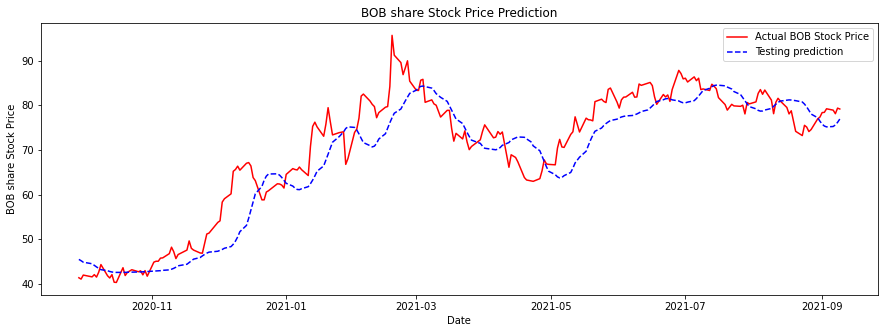

In [37]:
fig = plt.figure(figsize = (15, 5))
plt.plot(data.Date.values[ split_index+60 : ], data.Close.values[ split_index+60: ], 'r-', label = 'Actual BOB Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('BOB share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('BOB share Stock Price')
plt.legend()
plt.show()

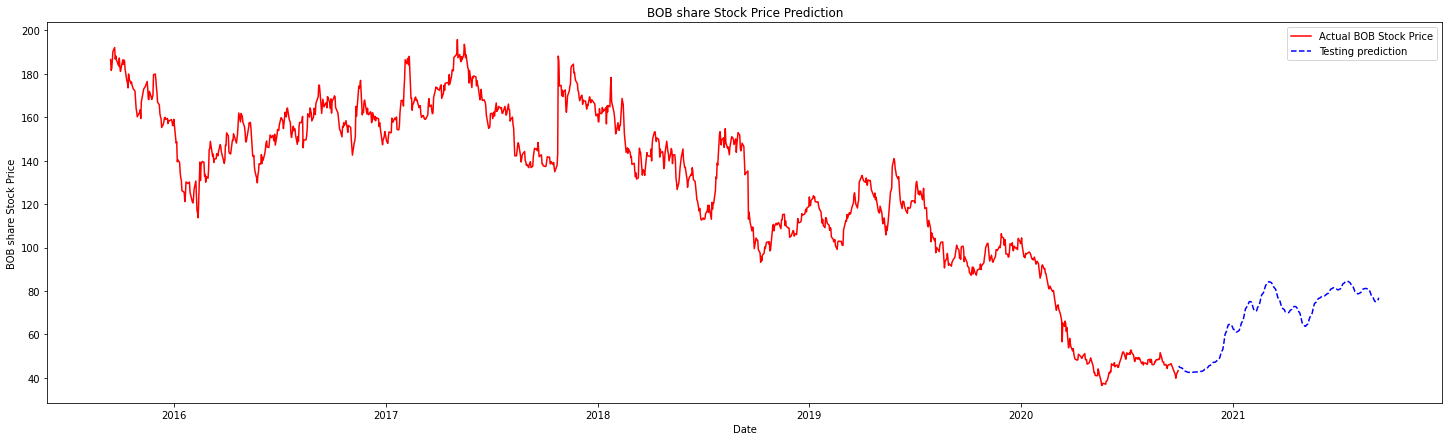

In [36]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date.values[ : split_index+60 ], data.Close.values[ : split_index+60 ], 'r-', label = 'Actual BOB Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('BOB share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('BOB share Stock Price')
plt.legend()
plt.show()

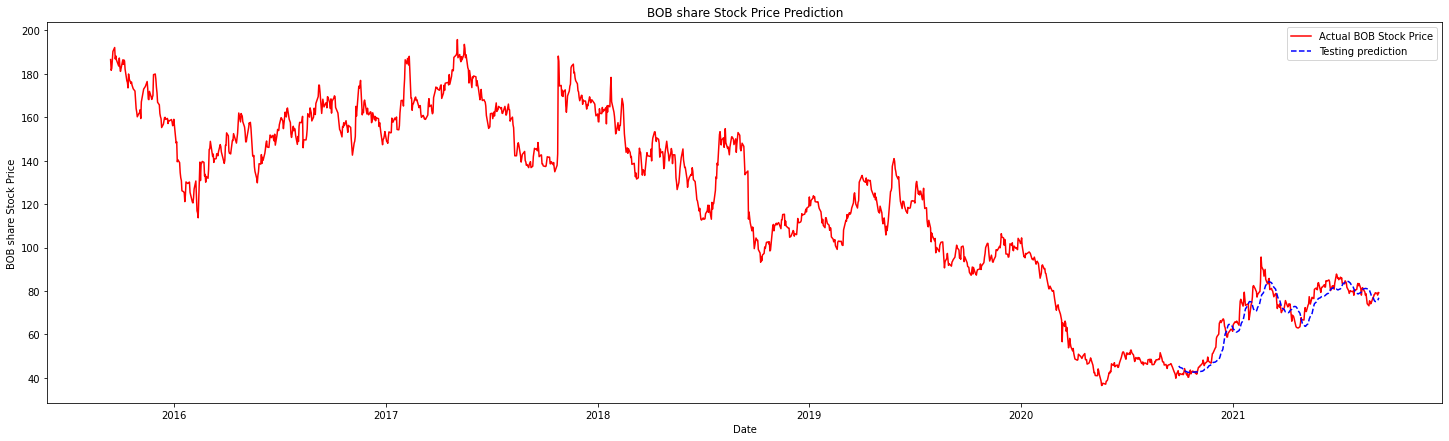

In [34]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date, data.Close, 'r-', label = 'Actual BOB Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('BOB share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('BOB share Stock Price')
plt.legend()
plt.show()